### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import ast

### Reading the Files

In [2]:
deliveries=pd.read_csv(r"C:\Users\THOTA CHANDRASEKHAR\Downloads\Intership\diminos_data_v2\diminos_data_v2\deliveries.csv")

In [3]:
order_items=pd.read_csv(r"C:\Users\THOTA CHANDRASEKHAR\Downloads\Intership\diminos_data_v2\diminos_data_v2\order_items.csv")

In [4]:
products=pd.read_csv(r"C:\Users\THOTA CHANDRASEKHAR\Downloads\Intership\diminos_data_v2\diminos_data_v2\products.csv")

In [5]:
orders=pd.read_csv(r"C:\Users\THOTA CHANDRASEKHAR\Downloads\Intership\diminos_data_v2\diminos_data_v2\orders.csv")

In [6]:
order_items["items_ordered"] = order_items["items_ordered"].apply(ast.literal_eval)

In [7]:
order_items = order_items.explode("items_ordered")

In [8]:
order_items

,order_id,items_ordered
0,321230114,p_025
0,321230114,p_032
0,321230114,p_037
1,321230115,p_017
1,321230115,p_012
...,...,...
454334,321684448,p_007
454334,321684448,p_003
454334,321684448,p_037
454335,321684449,p_022


In [9]:
deliveries,order_items,products,orders

(          order_id                     time_stamp            status
 0        321230114  2020-12-11 00:01:29.000000000           Pending
 1        321230114  2020-12-11 00:06:29.000000000  Out For Delivery
 2        321230114  2020-12-11 00:19:13.299151076         Delivered
 3        321230115  2020-12-11 00:36:02.000000000           Pending
 4        321230115  2020-12-11 00:41:02.000000000  Out For Delivery
 ...            ...                            ...               ...
 1363003  321684446  2024-01-31 23:58:08.494812502         Delivered
 1363004  321684449  2024-02-01 00:00:46.000000000  Out For Delivery
 1363005  321684448  2024-02-01 00:03:05.000000000  Out For Delivery
 1363006  321684449  2024-02-01 00:14:56.997433391         Delivered
 1363007  321684448  2024-02-01 00:17:50.996900711         Delivered
 
 [1363008 rows x 3 columns],
          order_id items_ordered
 0       321230114         p_025
 0       321230114         p_032
 0       321230114         p_037
 1       

In [10]:
a=pd.merge(orders,order_items,on="order_id")

In [11]:
a.rename(columns={"items_ordered":"item_id"},inplace=True)

In [12]:
b=pd.merge(a,products,on="item_id")

In [13]:
b

,order_id,order_placed_at,item_id,category,Item,Size,Price
0,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365
1,321230125,2020-12-11 03:02:34,p_025,Non Veg,Chicken Dominator,Regular,365
2,321230132,2020-12-11 03:47:25,p_025,Non Veg,Chicken Dominator,Regular,365
3,321230136,2020-12-11 04:19:56,p_025,Non Veg,Chicken Dominator,Regular,365
4,321230174,2020-12-11 08:04:24,p_025,Non Veg,Chicken Dominator,Regular,365
...,...,...,...,...,...,...,...
1158888,321684344,2024-01-31 16:49:59,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158889,321684386,2024-01-31 18:34:03,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158890,321684398,2024-01-31 19:05:01,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158891,321684401,2024-01-31 19:16:36,p_035,Non Veg,Chicken Pepperoni,Medium,609


In [14]:
df=pd.merge(b,deliveries,on="order_id")
df

,order_id,order_placed_at,item_id,category,Item,Size,Price,time_stamp,status
0,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:19:13.299151076,Delivered
3,321230114,2020-12-11 00:01:29,p_032,Non Veg,Indi Chicken Tikka,Medium,599,2020-12-11 00:01:29.000000000,Pending
4,321230114,2020-12-11 00:01:29,p_032,Non Veg,Indi Chicken Tikka,Medium,599,2020-12-11 00:06:29.000000000,Out For Delivery
...,...,...,...,...,...,...,...,...,...
3476674,321684037,2024-01-30 23:48:49,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-30 23:53:49.000000000,Out For Delivery
3476675,321684037,2024-01-30 23:48:49,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 00:08:18.420687791,Delivered
3476676,321684254,2024-01-31 13:13:34,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 13:13:34.000000000,Pending
3476677,321684254,2024-01-31 13:13:34,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 13:18:34.000000000,Out For Delivery


### What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [15]:
df

,order_id,order_placed_at,item_id,category,Item,Size,Price,time_stamp,status
0,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:19:13.299151076,Delivered
3,321230114,2020-12-11 00:01:29,p_032,Non Veg,Indi Chicken Tikka,Medium,599,2020-12-11 00:01:29.000000000,Pending
4,321230114,2020-12-11 00:01:29,p_032,Non Veg,Indi Chicken Tikka,Medium,599,2020-12-11 00:06:29.000000000,Out For Delivery
...,...,...,...,...,...,...,...,...,...
3476674,321684037,2024-01-30 23:48:49,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-30 23:53:49.000000000,Out For Delivery
3476675,321684037,2024-01-30 23:48:49,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 00:08:18.420687791,Delivered
3476676,321684254,2024-01-31 13:13:34,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 13:13:34.000000000,Pending
3476677,321684254,2024-01-31 13:13:34,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 13:18:34.000000000,Out For Delivery


In [16]:
df1=df[df["status"]=="Delivered"]

In [17]:
df1["time_stamp"]=pd.to_datetime(df1["time_stamp"])

C:\Users\THOTA CHANDRASEKHAR\AppData\Local\Temp\ipykernel_13328\2364456638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["time_stamp"]=pd.to_datetime(df1["time_stamp"])


In [18]:
df1["order_placed_at"]=pd.to_datetime(df1["order_placed_at"])

C:\Users\THOTA CHANDRASEKHAR\AppData\Local\Temp\ipykernel_13328\2179277023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["order_placed_at"]=pd.to_datetime(df1["order_placed_at"])


In [39]:
df

,order_id,order_placed_at,item_id,category,Item,Size,Price,time_stamp,status
0,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:19:13.299151076,Delivered
3,321230114,2020-12-11 00:01:29,p_032,Non Veg,Indi Chicken Tikka,Medium,599,2020-12-11 00:01:29.000000000,Pending
4,321230114,2020-12-11 00:01:29,p_032,Non Veg,Indi Chicken Tikka,Medium,599,2020-12-11 00:06:29.000000000,Out For Delivery
...,...,...,...,...,...,...,...,...,...
3476674,321684037,2024-01-30 23:48:49,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-30 23:53:49.000000000,Out For Delivery
3476675,321684037,2024-01-30 23:48:49,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 00:08:18.420687791,Delivered
3476676,321684254,2024-01-31 13:13:34,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 13:13:34.000000000,Pending
3476677,321684254,2024-01-31 13:13:34,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 13:18:34.000000000,Out For Delivery


In [40]:
df2=(df[df["status"]=="Pending"])

In [41]:
df2

,order_id,order_placed_at,item_id,category,Item,Size,Price,time_stamp,status
0,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:01:29.000000000,Pending
3,321230114,2020-12-11 00:01:29,p_032,Non Veg,Indi Chicken Tikka,Medium,599,2020-12-11 00:01:29.000000000,Pending
6,321230114,2020-12-11 00:01:29,p_037,Veg,Coke,Regular,71,2020-12-11 00:01:29.000000000,Pending
9,321230125,2020-12-11 03:02:34,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 03:02:34.000000000,Pending
12,321230125,2020-12-11 03:02:34,p_009,Veg,Farm House,Large,705,2020-12-11 03:02:34.000000000,Pending
...,...,...,...,...,...,...,...,...,...
3476664,321682772,2024-01-28 08:20:11,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-28 08:20:11.000000000,Pending
3476667,321683001,2024-01-28 17:00:16,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-28 17:00:16.000000000,Pending
3476670,321683700,2024-01-30 08:37:17,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-30 08:37:17.000000000,Pending
3476673,321684037,2024-01-30 23:48:49,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-30 23:48:49.000000000,Pending


In [57]:
df["min"]=(df1["time_stamp"]-df1["order_placed_at"]).dt.total_seconds()/60

In [19]:
df1["min"]=(df1["time_stamp"]-df1["order_placed_at"]).dt.total_seconds()/60

C:\Users\THOTA CHANDRASEKHAR\AppData\Local\Temp\ipykernel_13328\833626841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["min"]=(df1["time_stamp"]-df1["order_placed_at"]).dt.total_seconds()/60


In [20]:
avg=df1["min"].mean()

In [21]:
val=round(avg,2)
val

20.65

### What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [22]:
percentile_99 = np.percentile(df1["min"], 99)

In [23]:
print("99th percentile delivery time:", round(percentile_99,2), "minutes")

99th percentile delivery time: 30.89 minutes


### Which metric is the better choice to determine the stores performance based on Delivery Time?

In [24]:
median_delivery_time = np.median(df1["min"])

In [25]:
print("Median delivery time:", round(median_delivery_time,2), "minutes")

Median delivery time: 19.98 minutes


### What is the order id with the maximum delivery time?


In [50]:
df1[df1['min'] == df1['min'].max()]

,order_id,order_placed_at,item_id,category,Item,Size,Price,time_stamp,status,min
2819327,321629049,2023-09-21 15:49:55,p_037,Veg,Coke,Regular,71,2023-09-21 16:52:49.724687723,Delivered,62.912078
2819330,321629049,2023-09-21 15:49:55,p_029,Non Veg,Pepper Barbecue Chicken,Medium,419,2023-09-21 16:52:49.724687723,Delivered,62.912078
2819333,321629049,2023-09-21 15:49:55,p_022,Non Veg,Non Veg Supreme,Regular,365,2023-09-21 16:52:49.724687723,Delivered,62.912078


### How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?

In [51]:
jan_1st = "2024-01-01"
Feb_1st = "2024-02-01"

In [87]:
df1[(df1['time_stamp'] >= jan_1st) & (df1['time_stamp'] < Feb_1st) & (df1['Item'] != "Coke")]

,order_id,order_placed_at,item_id,category,Item,Size,Price,time_stamp,status,min,Order_year,hour,date
165329,321672182,2024-01-01 02:32:03,p_025,Non Veg,Chicken Dominator,Regular,365,2024-01-01 02:57:54.198799188,Delivered,25.853313,2024,2,2024-01-01
165335,321672182,2024-01-01 02:32:03,p_033,Non Veg,Indi Chicken Tikka,Large,879,2024-01-01 02:57:54.198799188,Delivered,25.853313,2024,2,2024-01-01
165338,321672233,2024-01-01 08:43:15,p_025,Non Veg,Chicken Dominator,Regular,365,2024-01-01 09:10:08.075638080,Delivered,26.884594,2024,8,2024-01-01
165344,321672233,2024-01-01 08:43:15,p_029,Non Veg,Pepper Barbecue Chicken,Medium,419,2024-01-01 09:10:08.075638080,Delivered,26.884594,2024,8,2024-01-01
165347,321672299,2024-01-01 13:13:38,p_025,Non Veg,Chicken Dominator,Regular,365,2024-01-01 13:31:46.855262959,Delivered,18.147588,2024,13,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476666,321682772,2024-01-28 08:20:11,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-28 08:43:48.779573001,Delivered,23.629660,2024,8,2024-01-28
3476669,321683001,2024-01-28 17:00:16,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-28 17:17:54.016427838,Delivered,17.633607,2024,17,2024-01-28
3476672,321683700,2024-01-30 08:37:17,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-30 08:58:53.753988276,Delivered,21.612566,2024,8,2024-01-30
3476675,321684037,2024-01-30 23:48:49,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 00:08:18.420687791,Delivered,19.490345,2024,23,2024-01-30


### How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?  This is important as Diminos promise 30 minutes delivery. For any pizza delivered after 30 minutes, customer will get a full refund

In [66]:
len(df1[(df1['order_placed_at'] >= jan_1st) & (df1['order_placed_at'] < Feb_1st) & (df1['min'] > 30)]['order_id'].unique())

162

### What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?

In [68]:
df1[(df1['order_placed_at'] >= "2023-01-01") & (df1['order_placed_at'] < "2024-01-01") & (df1['min'] > 30)]["Price"].sum()

1826393

### In which year Pizza store has lost maximum amount due to refunds on late deliveries?

In [69]:
df1['Order_year'] = df1['order_placed_at'].dt.year

C:\Users\THOTA CHANDRASEKHAR\AppData\Local\Temp\ipykernel_13328\3751136050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Order_year'] = df1['order_placed_at'].dt.year


In [71]:
df1[df1['min'] > 30].groupby('Order_year')["Price"].sum().sort_values(ascending = False)

Order_year
2023    1826393
2021    1791568
2022    1664113
2024     145669
2020      96688
Name: Price, dtype: int64

### How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.

In [73]:
sum(df1[df1['min'] < 30].groupby('Order_year')["Price"].sum().sort_values(ascending = False))

402310056

### (BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? (Implement this in a Jupyter Notebook. Upload your implementation on the google drive and share the link below.)                               Implement the above question on Jupyter Notebook. Upload your implementation on your google drive and share the link below.
10 points


In [74]:
df1['hour'] = df1['order_placed_at'].dt.hour

C:\Users\THOTA CHANDRASEKHAR\AppData\Local\Temp\ipykernel_13328\4286261469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hour'] = df1['order_placed_at'].dt.hour


In [77]:
df1['date']  =df1['order_placed_at'].dt.date

C:\Users\THOTA CHANDRASEKHAR\AppData\Local\Temp\ipykernel_13328\2110049343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']  =df1['order_placed_at'].dt.date


In [78]:
df1

,order_id,order_placed_at,item_id,category,Item,Size,Price,time_stamp,status,min,Order_year,hour,date
2,321230114,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 00:19:13.299151076,Delivered,17.738319,2020,0,2020-12-11
5,321230114,2020-12-11 00:01:29,p_032,Non Veg,Indi Chicken Tikka,Medium,599,2020-12-11 00:19:13.299151076,Delivered,17.738319,2020,0,2020-12-11
8,321230114,2020-12-11 00:01:29,p_037,Veg,Coke,Regular,71,2020-12-11 00:19:13.299151076,Delivered,17.738319,2020,0,2020-12-11
11,321230125,2020-12-11 03:02:34,p_025,Non Veg,Chicken Dominator,Regular,365,2020-12-11 03:24:01.429084233,Delivered,21.457151,2020,3,2020-12-11
14,321230125,2020-12-11 03:02:34,p_009,Veg,Farm House,Large,705,2020-12-11 03:24:01.429084233,Delivered,21.457151,2020,3,2020-12-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476666,321682772,2024-01-28 08:20:11,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-28 08:43:48.779573001,Delivered,23.629660,2024,8,2024-01-28
3476669,321683001,2024-01-28 17:00:16,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-28 17:17:54.016427838,Delivered,17.633607,2024,17,2024-01-28
3476672,321683700,2024-01-30 08:37:17,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-30 08:58:53.753988276,Delivered,21.612566,2024,8,2024-01-30
3476675,321684037,2024-01-30 23:48:49,p_035,Non Veg,Chicken Pepperoni,Medium,609,2024-01-31 00:08:18.420687791,Delivered,19.490345,2024,23,2024-01-30


In [79]:
per_hour = df1.groupby(['hour','date'])['order_placed_at'].count().reset_index()

In [80]:
per_hour.columns = ['hour', 'date', 'orders']

In [81]:
per_hour

,hour,date,orders
0,0,2020-12-11,7
1,0,2020-12-12,18
2,0,2020-12-13,23
3,0,2020-12-14,11
4,0,2020-12-15,8
...,...,...,...
27449,23,2024-01-27,43
27450,23,2024-01-28,31
27451,23,2024-01-29,16
27452,23,2024-01-30,19


In [82]:
per_hour_data = pd.pivot_table(data=per_hour, values='orders', index='date',columns='hour')

In [83]:
per_hour_data

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2020-12-11,7.0,9.0,12.0,20.0,15.0,10.0,24.0,31.0,78.0,26.0,...,58.0,76.0,68.0,99.0,62.0,81.0,26.0,29.0,42.0,18.0
2020-12-12,18.0,11.0,13.0,29.0,12.0,29.0,7.0,38.0,14.0,31.0,...,53.0,73.0,81.0,54.0,64.0,96.0,21.0,79.0,49.0,42.0
2020-12-13,23.0,13.0,12.0,21.0,4.0,10.0,20.0,32.0,34.0,26.0,...,48.0,44.0,35.0,55.0,73.0,37.0,35.0,18.0,47.0,11.0
2020-12-14,11.0,28.0,10.0,9.0,11.0,29.0,37.0,66.0,65.0,51.0,...,39.0,73.0,84.0,80.0,99.0,52.0,52.0,48.0,26.0,26.0
2020-12-15,8.0,25.0,7.0,16.0,22.0,14.0,12.0,44.0,52.0,78.0,...,60.0,65.0,60.0,77.0,67.0,43.0,38.0,57.0,35.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-27,23.0,15.0,16.0,9.0,28.0,10.0,24.0,27.0,45.0,41.0,...,51.0,36.0,54.0,47.0,44.0,27.0,29.0,19.0,21.0,43.0
2024-01-28,10.0,18.0,22.0,29.0,3.0,20.0,32.0,28.0,45.0,63.0,...,69.0,83.0,78.0,69.0,47.0,57.0,47.0,29.0,37.0,31.0
2024-01-29,18.0,3.0,29.0,24.0,12.0,3.0,14.0,28.0,29.0,32.0,...,129.0,76.0,144.0,227.0,102.0,49.0,32.0,41.0,13.0,16.0


In [84]:
per_hour_data.fillna(0,inplace=True)

<Axes: >

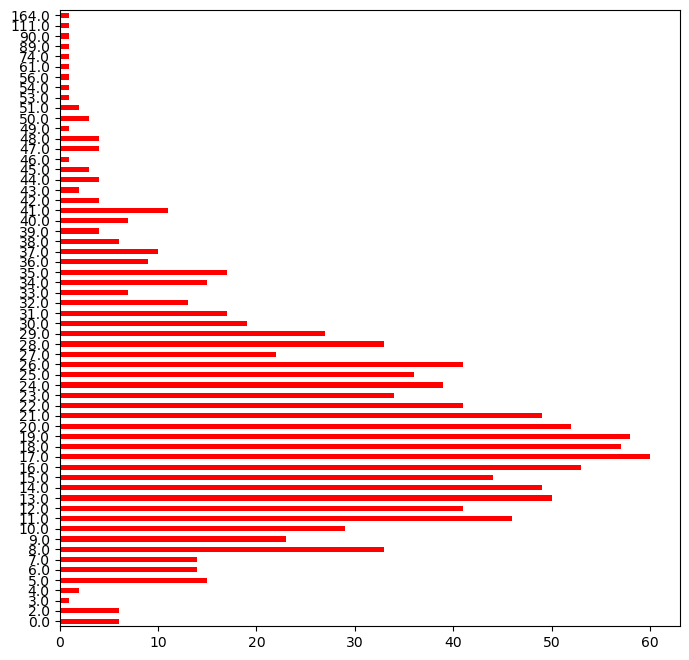

In [90]:
per_hour_data[0].value_counts().sort_index().plot(kind = 'barh',color=("red"), figsize = (8,8))

* Domino's has experienced consistent sales growth in recent years. In Q3 2023, global retail sales grew 4.9% when excluding the impact of foreign currency. This growth is even more impressive when considering the closure of the Russia market, which negatively impacted sales.
* Digital sales are a major driver of growth. Over 70% of Domino's orders in the US are placed online, and the company continues to invest in its digital ordering platform and loyalty program.
* Delivery remains the most popular ordering method. However, carry-out orders are also growing in popularity, especially as customers seek convenient meal options.
* There is some variation in sales performance across different regions. The US market remains the largest and most profitable for Domino's, but international markets are also showing strong growth.